<a href="https://colab.research.google.com/github/adolfolh/casuality-classification/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run to download data
!wget https://github.com/adolfolh/casuality-classification/raw/main/data/casualties-2020.csv

In [ ]:
# Download libraries
!pip install -U kaleido

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import kaleido
import plotly.express as px
import plotly.io as pio

# Change plotly renderer to display images in github
pio.renderers.default = "svg"

In [4]:
# Import data
raw_data = pd.read_csv("casualties-2020.csv", dtype={
    "accident_index" : "string",
    "accident_reference" : "string",
    "casualty_class" : "category",
    "sex_of_casualty" : "category",
    "age_band_of_casualty" : "category",
    "casualty_severity" : "category",
    "pedestrian_location" : "category",
    "pedestrian_movement" : "category",
    "car_passenger" : "category",
    "bus_or_coach_passenger" : "category",
    "pedestrian_road_maintenance_worker" : "category",
    "casualty_type" : "category",
    "casualty_home_area_type" : "category",
    "casualty_imd_decile" : "category"
    })

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 18 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   accident_index                      115584 non-null  string  
 1   accident_year                       115584 non-null  int64   
 2   accident_reference                  115584 non-null  string  
 3   vehicle_reference                   115584 non-null  int64   
 4   casualty_reference                  115584 non-null  int64   
 5   casualty_class                      115584 non-null  category
 6   sex_of_casualty                     115584 non-null  category
 7   age_of_casualty                     115584 non-null  int64   
 8   age_band_of_casualty                115584 non-null  category
 9   casualty_severity                   115584 non-null  category
 10  pedestrian_location                 115584 non-null  category
 11  pedestrian_mo

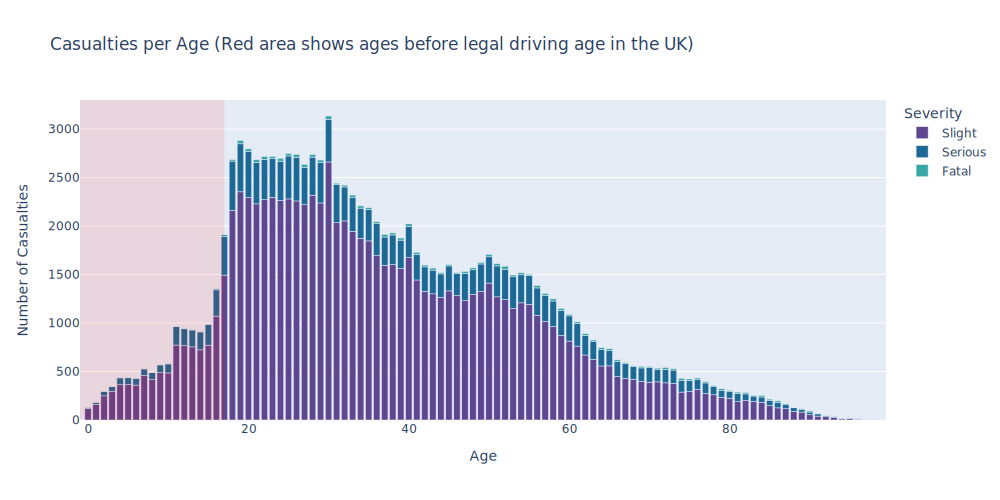

In [11]:
raw_data['casualty_severity'] = raw_data['casualty_severity'].cat.reorder_categories(['3', '2', '1'], ordered=True)

age_counts = pd.DataFrame(raw_data.groupby(['age_of_casualty', 'casualty_severity']).size()).reset_index()
age_counts.drop([0,1,2], axis=0, inplace=True)
age_counts.columns = ['age_of_casualty','casualty_severity','count']
age_counts['casualty_severity'] = age_counts['casualty_severity'].cat.rename_categories({'1' : 'Fatal', '2' : 'Serious', '3' : 'Slight'})

fig = px.bar(age_counts, 
             x='age_of_casualty',
             y='count',
             color='casualty_severity',
             title="Casualties per Age (Red area shows ages before legal driving age in the UK)",
             labels={'age_of_casualty' : 'Age', 'count' : 'Number of Casualties', 'casualty_severity' : 'Severity'},
             color_discrete_sequence=px.colors.qualitative.Prism,
             width=1000, height=500)
#fig.add_vline(x=17, line_width=1, line_dash="dot", line_color="red")
fig.add_vrect(x0=-1, x1=17, line_width=0, fillcolor="red", opacity=0.1)
fig.show()